In [9]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

# A command line argument.
input_name = "C:/Users/dartixus/PycharmProjects/kiv-zvi/SP/data_katastr/UAZK-B2-a-04-C-1428-002.JPG"





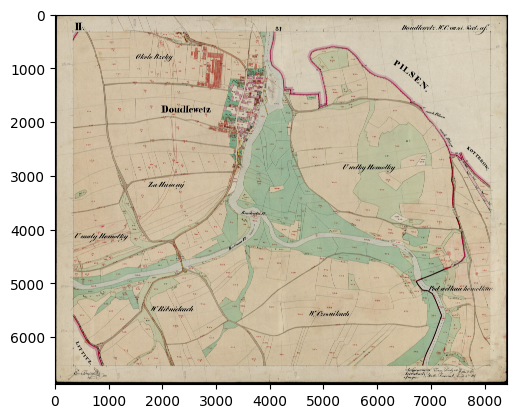

In [10]:
# It reads the image from the file.
img = cv2.cvtColor((cv2.imread(input_name,  cv2.COLOR_BGR2RGB)),  cv2.COLOR_BGR2RGB)

assert img is not None, "file could not be read, check with os.path.exists()"
# A Canny edge detector.
# img = cv2.Canny(img, 1, 500)
plt.imshow(img)

In [11]:
img = (cv2.imread(input_name, cv2.IMREAD_GRAYSCALE))
assert img is not None, "file could not be read, check with os.path.exists()"

In [13]:
def get_sizes_procentual(procentual: float):
    # Taking the right xx% of the image.
    right_border = int(img.shape[1] * procentual)
    # Taking the left xx% of the image.
    left_border = int(img.shape[1] * (1 - procentual))
    # Taking the bottom xx% of the image.
    bottom_border = int(img.shape[0] * procentual)
    # Taking the top xx% of the image.
    top_border = int(img.shape[0] * (1 - procentual))
    return right_border, left_border, bottom_border, top_border

In [20]:
right_border, left_border, bottom_border, top_border = get_sizes_procentual(0.01)
print(bottom_border, top_border, right_border, left_border)
print(img.shape)
img = img[bottom_border:top_border, right_border:left_border]


68 6812 84 8333
(6881, 8418)


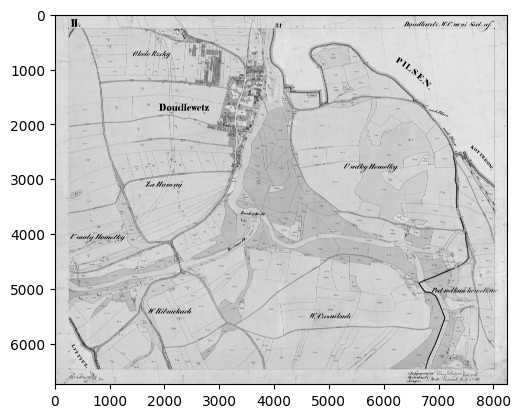

In [21]:
plt.imshow(img, cmap='gray')

In [22]:
# Taking the right 90% of the image.
right_border = int(img.shape[1] * 0.9)
# Taking the left 10% of the image.
left_border = int(img.shape[1] * 0.1)
# Taking the bottom 90% of the image.
bottom_border = int(img.shape[0] * 0.9)
# Taking the top 10% of the image.
top_border = int(img.shape[0] * 0.1)

# Taking the right, left, bottom and top border of the image.
right_border = img[:, right_border:]
left_border = img[:, :left_border]
bottom_border = img[bottom_border:, :]
top_border = img[:top_border, :]
print(top_border.shape)

(674, 8249)


In [23]:
def euclidean_2D(x1, x2, y1, y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

# Create default parametrization LSD
lsd = cv2.createLineSegmentDetector(0)

# Detect lines in the image
lines = lsd.detect(top_border)[0]  # Position 0 of the returned tuple are the detected lines
lines = np.squeeze(lines)
distances = np.array([euclidean_2D(i[0], i[2], i[1], i[3],)  for i in lines])

In [24]:

print(distances.shape)
longest_line_index = np.argpartition(distances, -20)[-20:]
print(longest_line_index)
longest_lines = lines[longest_line_index]
longest_lines = longest_lines.astype(int)
print(longest_lines)

(3051,)
[ 404 2054 1183  443  466  969  339  991  802 1068  725  697 1102 1551
  433  946  885  925 1194 1663]
[[2535  434 2844  509]
 [6264  265 5943  264]
 [ 985  396 1306  385]
 [3928  580 3985  265]
 [1744  345 1700  671]
 [ 689  667  520  262]
 [ 643  595  488  264]
 [3420  266 2894  267]
 [3458  397 2923  376]
 [ 598  414  983  396]
 [2923  373 3480  395]
 [1312  268 1308  671]
 [7591  266 6936  266]
 [ 983  267  535  267]
 [1697  671 1745  311]
 [1304  562  655  572]
 [2956  545 3506  565]
 [3514  569 2958  549]
 [1014  398  599  417]
 [5110  264 4594  265]]


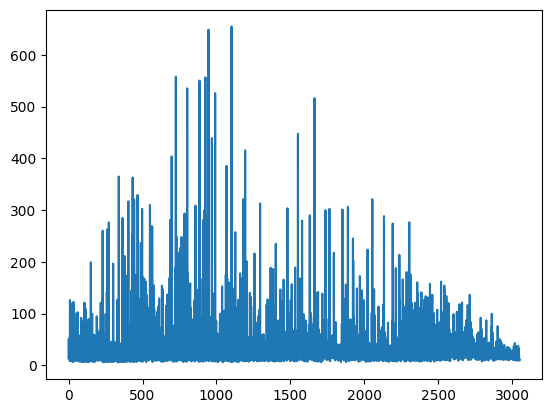

In [25]:
plt.plot(np.arange(0, len(distances)), distances)

In [149]:

# It creates a white image with the same size as the input image.
white = np.zeros_like(top_border)
white[:] = 255

(674, 8249)


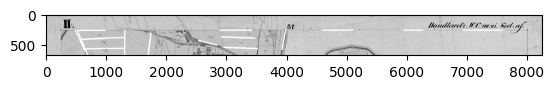

: 

In [26]:

# Draw detected lines in the image
for i in longest_lines:
    top_border = cv2.line(top_border, (i[0], i[1]), (i[2], i[3]), (255,0,0),20)
print(top_border.shape)
# It converts the image from BGR to grayscale.
# drawn_img = cv2.cvtColor(white, cv2.COLOR_BGR2GRAY)
plt.imshow(top_border, cmap='gray')


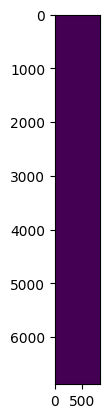

In [92]:

# Showing the image.
plt.imshow(right_border)
plt.show()

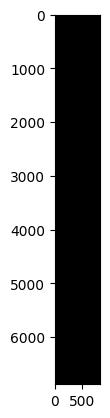

In [93]:

plt.imshow(left_border, cmap='gray')
plt.show()

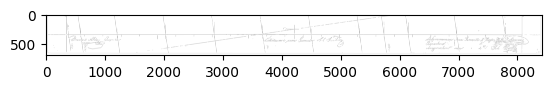

In [ ]:

plt.imshow(bottom_border, cmap='gray')
plt.show()

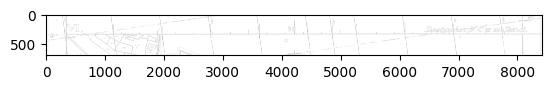

In [ ]:

plt.imshow(top_border, cmap='gray')
plt.show()

